データフローグラフでは、ノードは計算の単位を表し、エッジは計算によって消費または生成されるデータを表す。

In [2]:
!pip install tensorflow==1.14.0

    100% |████████████████████████████████| 105.8MB 273kB/s eta 0:00:01   22% |███████▎                        | 23.9MB 13.9MB/s eta 0:00:06    88% |████████████████████████████▍   | 93.7MB 75.2MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/91/2d/2ed263449a078cd9c8a9ba50ebd50123adf1f8cfbea1492f9084169b89d9/tensorboard-1.14.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3c/d5/21860a5b11caf0678fbc8319341b0ae21a07156911132e0e71bffed0510d/tensorflow_estimator-1.14.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
    100% |████████████████████████████████| 593kB 27.1MB/s ta 0:00:01
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0
  Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Succe

Using TensorFlow backend.


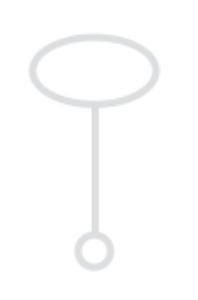

In [3]:
import os
import os.path
from IPython.display import display
from PIL import Image
from keras import backend as K 

img = "Dataflow.png"
display(Image.open(img))

円（定数）と楕円(数学的な操作)をノード(オペレーション)、ノードを結ぶ線のことをエッジ（tensor：多次元データ配列)と呼ぶ。

(円（定数）はプログラム上では定数を表しているように見えるが、Tensorflowでは値を出力するオペレーションに当たる)

In [4]:
import tensorflow as tf

print(tf.VERSION)  # tf.__version__でもよい

1.14.0


In [5]:
one = tf.constant(1, name='one')
print('ワン',one) # Tensor("one:0", shape=(), dtype=int32)

print('============================')

sess = tf.Session()
result = sess.run(one)
print(result) # 1

ワン Tensor("one:0", shape=(), dtype=int32)
1


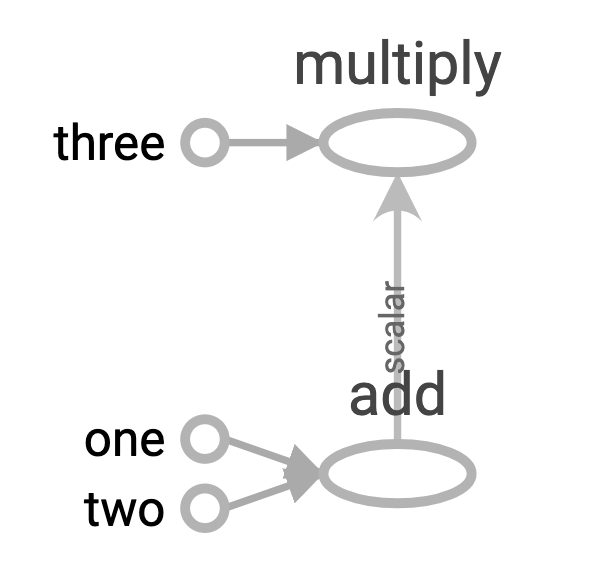

In [6]:
img = "my_graph.png"
display(Image.open(img))

In [7]:
tf.reset_default_graph() # To clear the defined variables and operations of the previous cell

sess = tf.Session()

# create graph
five_np = 5
four_np = 4
one = tf.constant(1, name='one')            # 定数を定義(nameはTensorboard用)
two = tf.constant(2, name='two')
three = tf.constant(3, name='three')
add = four_np + five_np + one
print(add)
three = tf.constant(10, name='three')
print(three)
#add = tf.add(one, two, name="add")
mul = add*three
# 足し算を定義
#mul = tf.multiply(add, three, name="multiply") # 掛け算を定義

with tf.Session() as sess:
    print('計算結果：',sess.run([add, mul]))
    writer = tf.summary.FileWriter ( 'my_graph' , sess.graph ) # グラフの可視化用

Tensor("add:0", shape=(), dtype=int32)
Tensor("three_1:0", shape=(), dtype=int32)
計算結果： [10, 100]


In [8]:
!tensorboard --logdir=my_graph --port=8010

W0306 10:11:06.762234 123145349771264 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0306 10:11:06.768702 123145349771264 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0306 10:11:06.774024 123145349771264 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0306 10:11:06.780601 123145349771264 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0306 10:11:06.787515 12

W0306 10:11:06.938401 123145349771264 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
TensorBoard 1.14.0 at http://yoshikos-MacBook-Pro.local:8010/ (Press CTRL+C to quit)
^C


In [9]:
tf.reset_default_graph() # To clear the defined variables and operations of the previous cell

sess = tf.Session()

# create graph
one = tf.constant(1, name='one')            # 定数を定義(nameはTensorboard用)
two = tf.constant(2, name='two')
three = tf.constant(3, name='three')
add = tf.add(one, two, name="add_add") # 足し算を定義
mul = tf.multiply(add, three, name="multiply") # 掛け算を定義
print(three)
with tf.Session() as sess:
    print('計算結果：',sess.run([add, mul]))
    writer = tf.summary.FileWriter ( 'our_graph' , sess.graph ) # グラフの可視化用

Tensor("three:0", shape=(), dtype=int32)
計算結果： [3, 9]


In [10]:
!tensorboard --logdir=our_graph --port=8011

W0306 10:12:48.650498 123145476804608 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0306 10:12:48.651218 123145476804608 plugin_event_accumulator.py:302] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W0306 10:12:48.659028 123145476804608 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0306 10:12:48.659217 123145476804608 plugin_event_accumulator.py:302] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W0306 10:12:48.669034 123145476804608 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or mor

In [11]:
#K.clear_session()
tf.reset_default_graph() # To clear the defined variables and operations of the previous cell

sess = tf.Session()

# create graph
four = tf.constant ( 5 , name = "four" ) 
five = tf.constant ( 3 , name = "five" ) 
six = tf.multiply ( four , five , name = "six" )
add1 = tf.add ( four , five , name = "add1" ) 
add2 = tf.add ( six , add1 , name = "add2" ) 

# creating the writer out of the session
# writer = tf.summary.FileWriter('./graphs', tf.get_default_graph())
with tf.Session() as sess:
    print('計算結果',sess.run(add2))
    writer = tf.summary.FileWriter ( 'your_graph' , sess.graph ) # tf.train.SummaryWriterを置換


計算結果 23


In [ ]:
!tensorboard --logdir=your_graph --port=8012

W0306 10:16:18.600787 123145429213184 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0306 10:16:18.606439 123145429213184 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0306 10:16:18.611747 123145429213184 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0306 10:16:18.616900 123145429213184 plugin_event_accumulator.py:294] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0306 10:16:18.622031 12

In [8]:
tf.reset_default_graph()

def f(x):
    x = x + 5
    x = tf.sqrt(x)
    return x

X = tf.placeholder(dtype=tf.float32, shape=(None), name='x_input')

v2 = tf.Variable(4.0)
print(f(v2))
init = tf.global_variables_initializer()

# Graph Modeで実行される
with tf.Session() as sess:
    sess.run(init)

    print(sess.run(f(v2)))

Tensor("Sqrt:0", shape=(), dtype=float32)
3.0


In [ ]:
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_"):
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))